In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
train = pd.read_csv("C:\\Users\\Lenovo\\train_gender_submission.csv")
test = pd.read_csv("C:\\Users\\Lenovo\\test_gender_submission.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#drop PassengerID column and Ticket column
for df in [train,test]:
    df.drop(['PassengerId'],axis = 1, inplace = True)
    df.drop(['Ticket'], axis = 1, inplace = True)

In [13]:
categorical = [var for var in train.columns if train.dtypes[var] == 'O']
print("There are {} categorical variables in train\n".format(len(categorical)))
print("The Categorical variables are",categorical)

There are 4 categorical variables in train

The Categorical variables are ['Name', 'Sex', 'Cabin', 'Embarked']


In [14]:
train.shape

(891, 10)

In [15]:
test.shape

(418, 9)

In [16]:
numerical = [var for var in train.columns if train.dtypes[var] != 'O']
print("There are {} numerical variables in train\n".format(len(numerical)))
print("The numerical variables are",numerical)

There are 6 numerical variables in train

The numerical variables are ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
#Process the Name and extract Title
print(train['Name'][0].split(', ')[1].split('.')[0])

Mr


In [18]:
for index in range(len(train)):
    train['Title'] = train['Name'][index].split(', ')[1].split('.')[0]

In [19]:
train['Title'].head()

0    Mr
1    Mr
2    Mr
3    Mr
4    Mr
Name: Title, dtype: object

In [20]:
for index in range(len(test)):
    test['Title'] = test['Name'][index].split(', ')[1].split('.')[0]

In [21]:
for df in [train,test]:
    df.drop('Name',axis = 1, inplace = True)

In [22]:
categorical = [var for var in train.columns if train.dtypes[var] == 'O']

In [23]:
#find null values in categorical
for col in categorical:
    print(train[col].value_counts())

male      577
female    314
Name: Sex, dtype: int64
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
D              3
              ..
B69            1
C70            1
F G63          1
E36            1
D48            1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Mr    891
Name: Title, dtype: int64


In [24]:
for col in categorical:
    if train[col].isnull().values.any():
        print(col)

Cabin
Embarked


In [25]:
for col in numerical:
    if train[col].isnull().values.any():
        print(col)

Age


In [26]:
for col in categorical:
    train[col].fillna(train[col].mode()[0],inplace = True)

In [27]:
for col in numerical:
    train[col].fillna(train[col].mean(),inplace = True)

In [28]:
train.isna().values.any()

False

In [29]:
for col in categorical:
    test[col].fillna(test[col].mode()[0],inplace = True)

In [30]:
for col in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    test[col].fillna(test[col].mean(),inplace = True)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,B96 B98,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mr
2,1,3,female,26.0,0,0,7.9250,B96 B98,S,Mr
3,1,1,female,35.0,1,0,53.1000,C123,S,Mr
4,0,3,male,35.0,0,0,8.0500,B96 B98,S,Mr


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

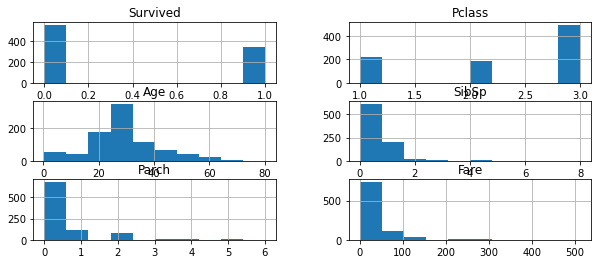

In [33]:
#Exploratory data analysis
#Univariate visualization
#quantitative features
quant_features = numerical
train[quant_features].hist(figsize=(10,4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

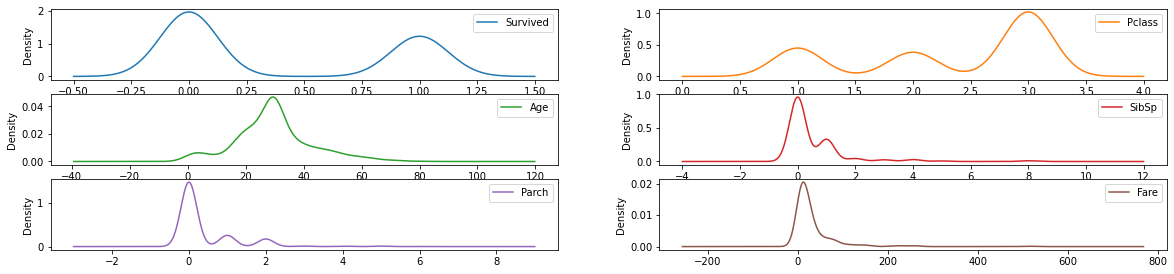

In [39]:
train[quant_features].plot(kind='density',subplots=True, layout = (4,2), sharex = False, figsize=(20,6))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

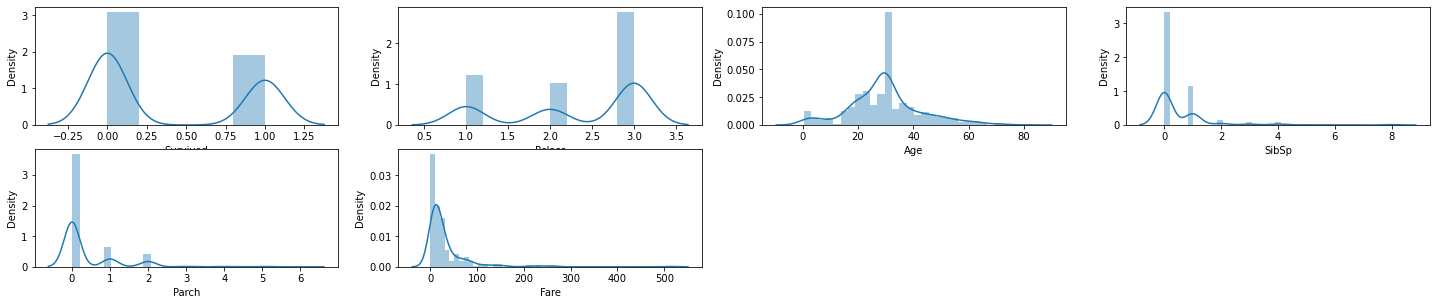

In [42]:
# sns.distplot
f = plt.figure(figsize=(25,10))
for col in quant_features:
    plt.subplot(4,4,quant_features.index(col) + 1)
    sns.distplot(train[col])

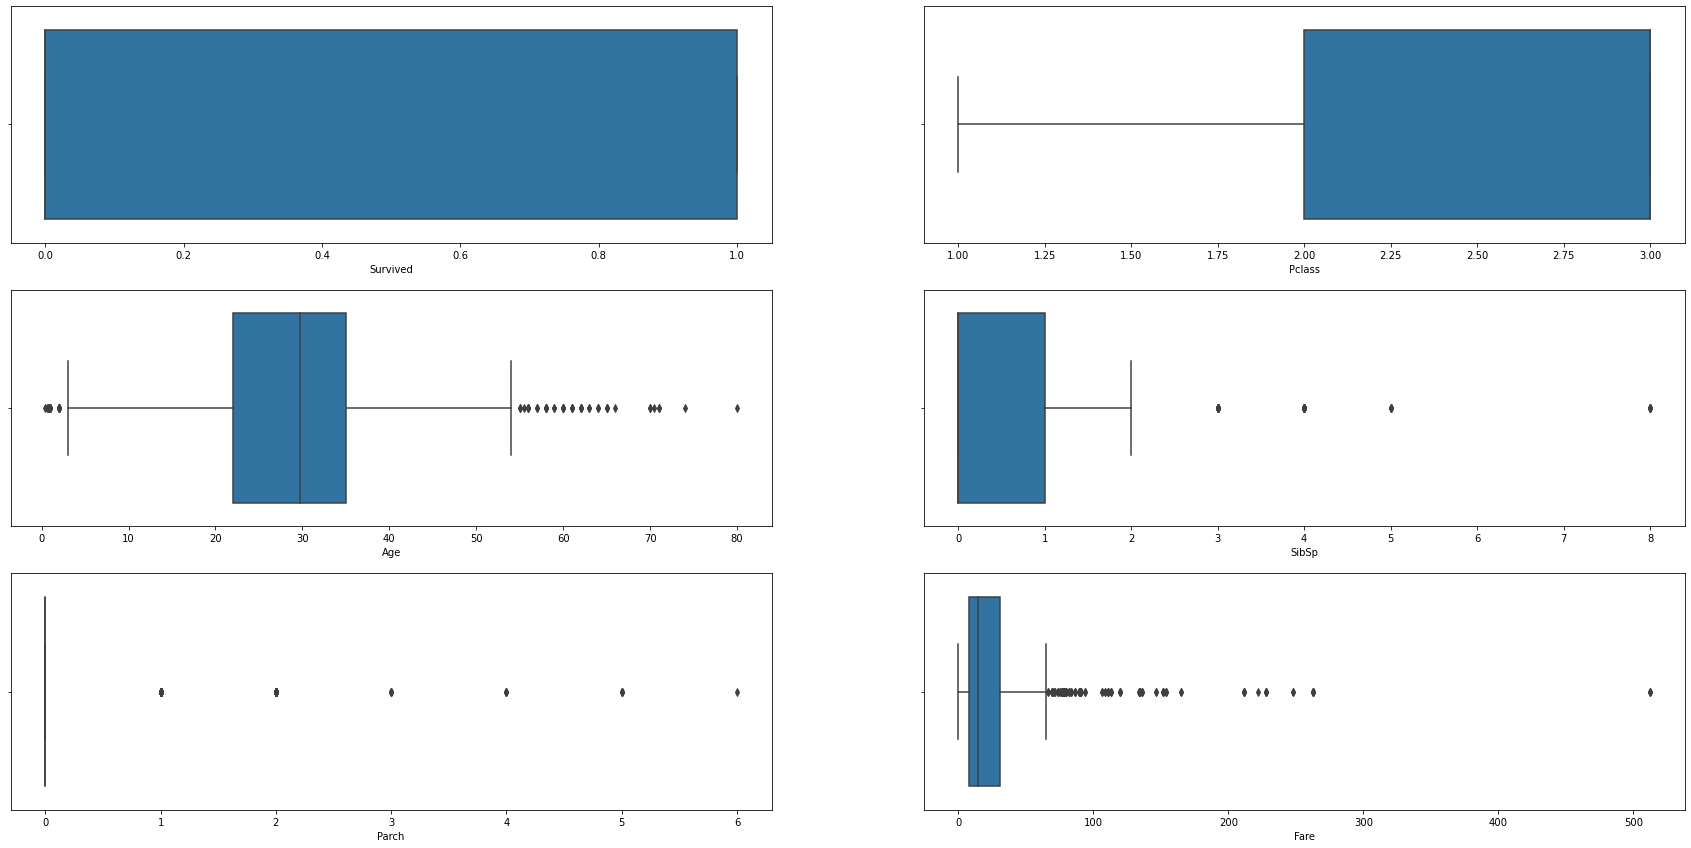

In [45]:
#sns.boxplot
f = plt.figure(figsize=(30,20))
for col in quant_features:
    plt.subplot(4,2,quant_features.index(col) + 1)
    sns.boxplot(x=col,data=train)

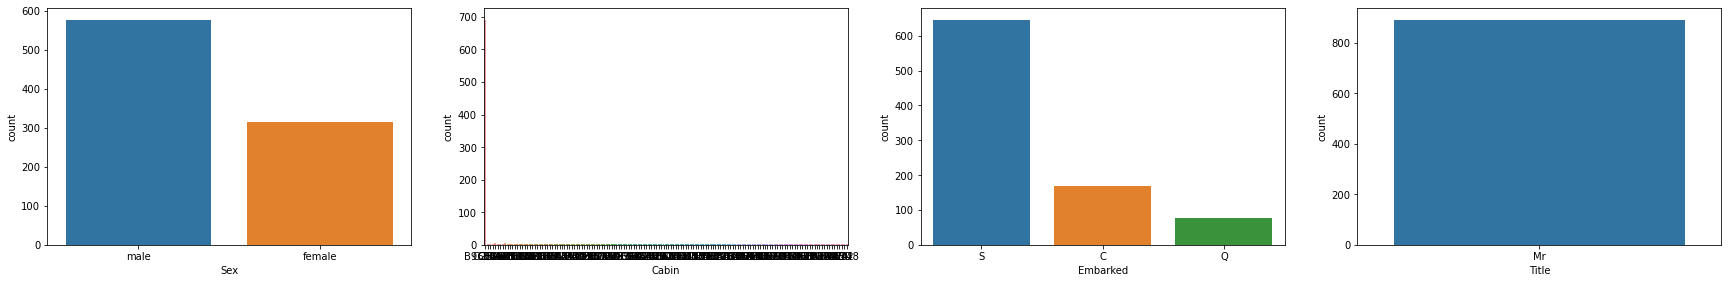

In [47]:
# Countplot(barplot)
f = plt.figure(figsize=(30,20))
for col in categorical:
    plt.subplot(4,4,categorical.index(col)+1)
    sns.countplot(x=col, data=train)

<AxesSubplot:>

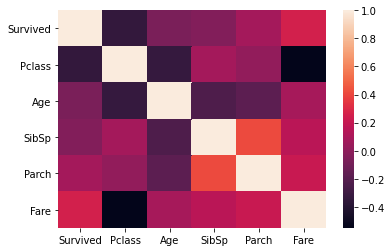

In [48]:
#Multivariate visualization
#correlation matrix
corr_matrix = train[numerical].corr()
sns.heatmap(corr_matrix)

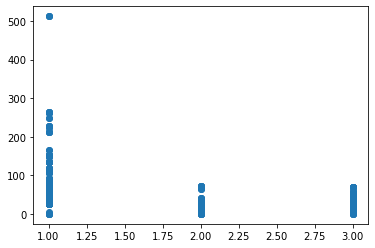

In [54]:
#Scatter plot
#['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.scatter(train['Pclass'],train['Fare'])